In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [16]:
# Step 1: Load the data from the CSV file
data = pd.read_csv("filteredData.csv")

# Step 2: Extract the independent variables (X) and the dependent variable (y)
X = data.iloc[:, 1:]  # Assumes the independent variables start from column index 1
y = data.iloc[:, 0]   # Assumes the dependent variable (price) is in the first column

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Step 4: Define the hyperparameter grid
param_grid = {'fit_intercept': [True],
                'positive': [True],
            }


# Step 5: Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 6: Get the best hyperparameters and create the model
best_params = grid_search.best_params_
model = LinearRegression(**best_params)
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [23]:
# Step 5: Make predictions on the testing set
y_pred = model.predict(X_test)
# Step 6: Calculate the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the error metrics
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'fit_intercept': True, 'positive': True}
Mean Absolute Error: 16446420.155494627
Mean Squared Error: 1127809026837304.5


In [31]:
# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

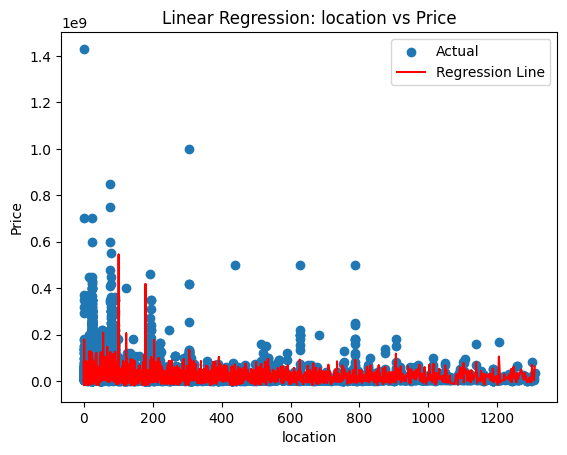

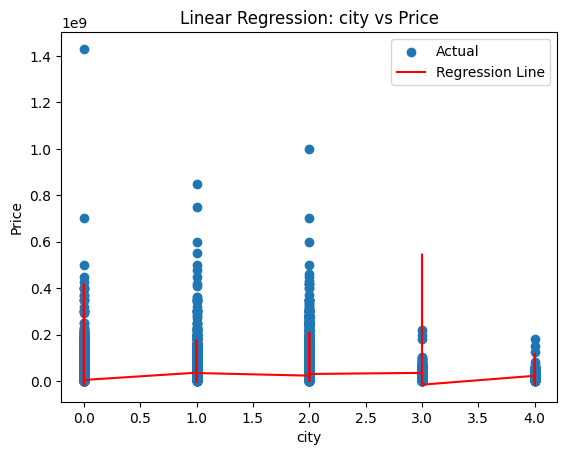

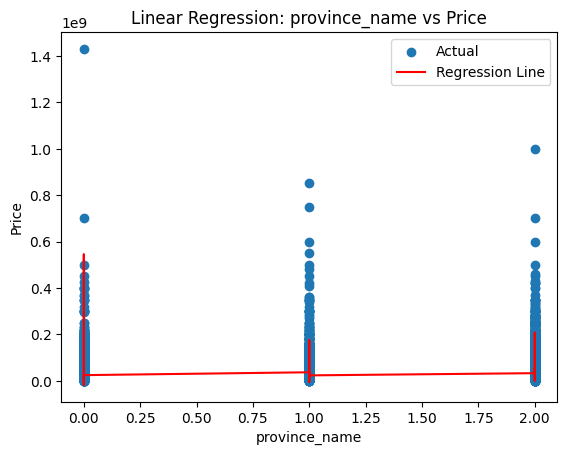

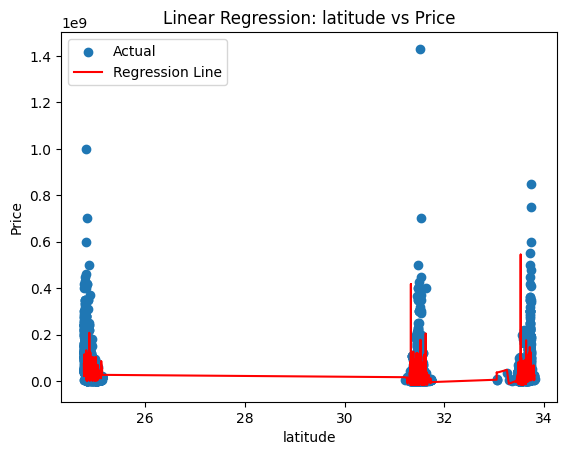

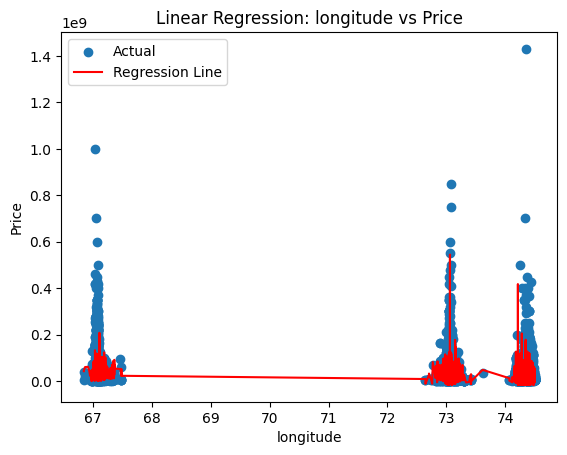

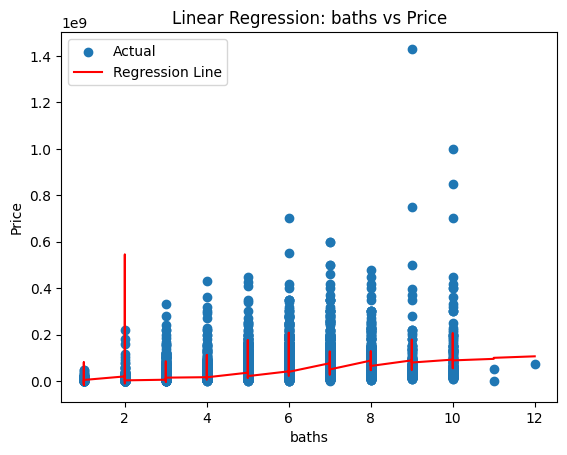

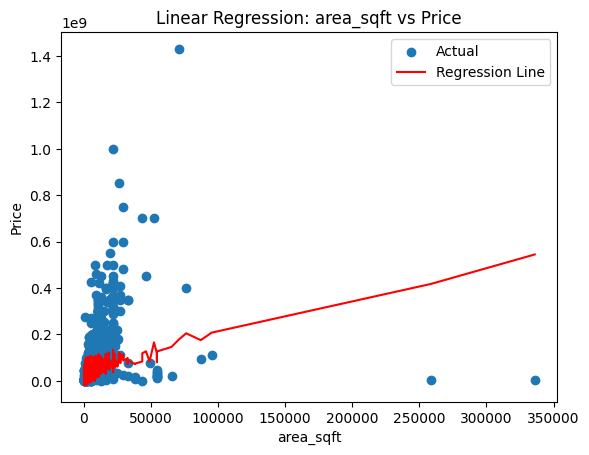

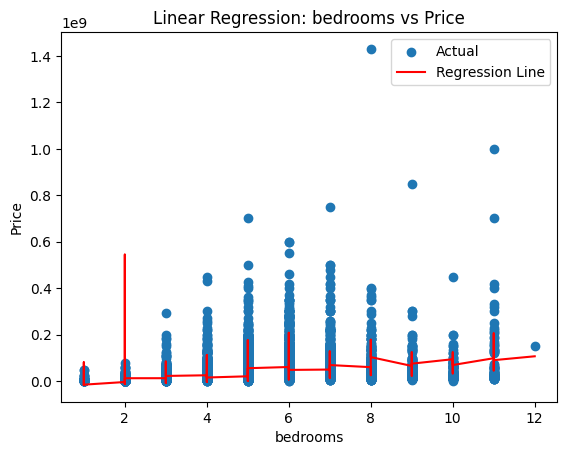

In [30]:

for i, feature in enumerate(X_test.columns):
    # Select the feature values
    x = X_test.iloc[:, i]
    
    # Sort the values of x and y_test together
    sorted_indices = np.argsort(x)
    x_sorted = x.iloc[sorted_indices]
    y_test_sorted = y_test.iloc[sorted_indices]
    
    # Make predictions on the sorted feature values
    y_pred = model.predict(X_test)
    y_pred_sorted = y_pred[sorted_indices]
    
    # Plot the sorted values and regression line
    plt.scatter(x_sorted, y_test_sorted, label="Actual")
    plt.plot(x_sorted, y_pred_sorted, color='red', label="Regression Line")
    
    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title("Linear Regression: {} vs Price".format(feature))
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()